In [141]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import glob
import imageio
import json
import marsican_functions as msn
import numpy as np
import os
import shutil
import sys
import tensorflow as tf

from keras_preprocessing.image import ImageDataGenerator
from PIL import Image

In [68]:
datagen = ImageDataGenerator(rotation_range=30, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True
                            )

In [35]:
plate_metadata = glob.glob('F:\Colonies_Data\*\metadata.json')
all_img_paths = list()
for metadata_loc in plate_metadata:
    absolute_path = metadata_loc.split("\\metadata.json")[0]
    with open(metadata_loc, 'r') as f:
        colony_pic_metadata_json = f.read()
        colony_pic_metadata = json.loads(colony_pic_metadata_json)
    img_paths = msn.extract_paths_with_colonies(colony_pic_metadata['images_list'], max_colonies=99 )
    full_img_paths = [(path[0], absolute_path + '/' + path[1]) for path in img_paths]
    all_img_paths.append(full_img_paths)
all_img_paths = msn.flatten(all_img_paths)
Lt100_colonies_images = [t[1] for t in all_img_paths]

ex_img_path = Lt100_colonies_images[7]
ex_img = imageio.imread(ex_img_path)

Image.fromarray(ex_img).resize((200, 200)).convert('L')

PIL.Image.Image

In [29]:
x = cv2.imread(ex_img_path, flags=0)

In [37]:
y = tf.image.rgb_to_grayscale(ex_img)

In [42]:
z = tf.compat.v1.image.resize_image_with_pad(ex_img, 200, 200)

In [65]:
q = np.array(Image.fromarray(ex_img).resize((200, 200)))

In [66]:
transform_parameters = {
    'theta': 30,
    'ty': 0.2,
    'tx': 0.2
}
q_t = ImageDataGenerator().apply_transform(q, transform_parameters)

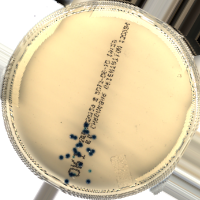

In [67]:
Image.fromarray(q_t)

write to file with name 'plate{i}_{num_colonies}.png'

In [70]:
all_img_paths[:3]

[(1,
  'F:\\Colonies_Data\\MicrobIA_Dataset_only_counted_processed_anonimyzed_part9/F/T4h_inf/IMG_Niguarda1_127_121_F6_T543.png'),
 (2,
  'F:\\Colonies_Data\\MicrobIA_Dataset_only_counted_processed_anonimyzed_part9/S/T4h_inf/IMG_Niguarda1_1352_710_S54_T962.png'),
 (6,
  'F:\\Colonies_Data\\MicrobIA_Dataset_only_counted_processed_anonimyzed_part9/F/T4h_inf/IMG_Niguarda1_1421_610_F6_T541.png')]

In [87]:
for i, cc_path in enumerate(all_img_paths[1:]):
    new_path = 'data/plate '+ str(i) +'_'+ str(cc_path[0]) + '.png'
    shutil.move(cc_path[1], new_path)

In [89]:
file_paths_on_wdws = glob.glob('data/*.png')

In [90]:
file_paths_on_wdws[:3]

['data\\plate 0_1.png', 'data\\plate 1000_11.png', 'data\\plate 1001_17.png']

In [92]:
for file_path in file_paths_on_wdws:
    shutil.move(file_path, 'F:\\Colonies_Data\\' + file_path)

In [146]:
def extract_colony_count(filepath, start_search=15):
    start_idx = filepath.index('_', start_search)
    end_idx = filepath.index('.png', start_idx)
    return filepath[start_idx + 1:end_idx]

In [147]:
data_paths = glob.glob('F:\\Colonies_Data\\data\\*.png')
y = [extract_colony_count(dp) for dp in data_paths]

In [151]:
if 'win' in sys.platform:
    data_directory='F:\\Colonies_Data\\'
datagen.flow_from_directory(data_directory, target_size=(256, 256), color_mode="grayscale", class_mode='sparse', classes=y)

Found 0 images belonging to 1204 classes.
